## Building the Price Prediction Model

### Now its time for making Pipeline and Model 🚀

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import FeatureHasher 
from sklearn import set_config
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

import pandas as pd

#### Reading the Dataset

In [2]:
dataset_for_training = pd.read_csv("Dataset_for_training.csv")

In [3]:
dataset_for_training.columns

Index(['Unnamed: 0', 'Car_Name', 'Brand_Name', 'Engine Capacity', 'Category',
       'Body Condition', 'model Year', 'Milage', 'Fuel Type', 'Transmission',
       'Color', 'City Registered', 'Price'],
      dtype='object')

In [4]:
dataset_for_training.head()

,Unnamed: 0,Car_Name,Brand_Name,Engine Capacity,Category,Body Condition,model Year,Milage,Fuel Type,Transmission,Color,City Registered,Price
0,0,Alsvin,Changan,1500,Sedan,Good,2022,57000,Petrol,Automatic,Steller White,Islamabad,38.50
1,1,Alsvin,Changan,1500,Sedan,Excellent,2022,23000,Petrol,Automatic,Steller White,Punjab,36.95
2,2,Alsvin,Changan,1500,Sedan,Good,2022,11900,Petrol,Automatic,Galaxy Black,Islamabad,36.90
3,3,Alsvin,Changan,1500,Sedan,Fair,2021,40000,Petrol,Automatic,Silver,Islamabad,37.50
4,4,Alsvin,Changan,1500,Sedan,Good,2022,16000,Petrol,Automatic,Black,Karachi,37.50


In [5]:
# dropping the unwanted column
dataset_for_training.drop(columns=['Unnamed: 0'] , axis=1,inplace=True)

In [6]:
dataset_for_training.head()

,Car_Name,Brand_Name,Engine Capacity,Category,Body Condition,model Year,Milage,Fuel Type,Transmission,Color,City Registered,Price
0,Alsvin,Changan,1500,Sedan,Good,2022,57000,Petrol,Automatic,Steller White,Islamabad,38.50
1,Alsvin,Changan,1500,Sedan,Excellent,2022,23000,Petrol,Automatic,Steller White,Punjab,36.95
2,Alsvin,Changan,1500,Sedan,Good,2022,11900,Petrol,Automatic,Galaxy Black,Islamabad,36.90
3,Alsvin,Changan,1500,Sedan,Fair,2021,40000,Petrol,Automatic,Silver,Islamabad,37.50
4,Alsvin,Changan,1500,Sedan,Good,2022,16000,Petrol,Automatic,Black,Karachi,37.50


In [7]:
# re-arranging the columns
dataset_for_training = dataset_for_training[['model Year','Milage','City Registered','Color','Engine Capacity','Brand_Name','Car_Name','Transmission','Fuel Type','Body Condition','Category','Price']]

<Axes: xlabel='Brand_Name'>

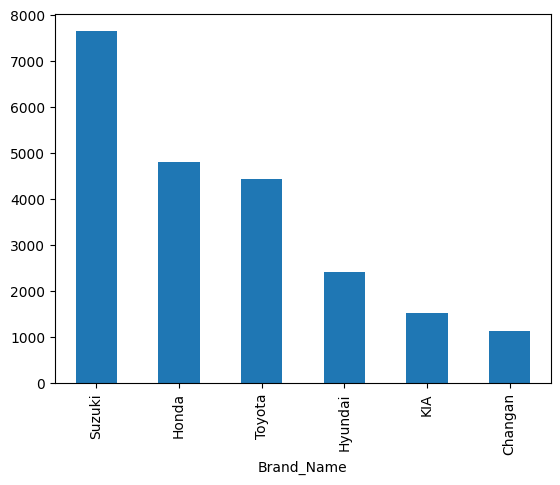

In [8]:
dataset_for_training.Brand_Name.value_counts().nlargest(30).plot(kind='bar')

Conveert All Data to Lower Case

In [9]:
lower_case_string = lambda x : x.lower() if isinstance(x,str) else x
dataset_for_training = dataset_for_training.map(lower_case_string)

In [10]:
dataset_for_training.head()

,model Year,Milage,City Registered,Color,Engine Capacity,Brand_Name,Car_Name,Transmission,Fuel Type,Body Condition,Category,Price
0,2022,57000,islamabad,steller white,1500,changan,alsvin,automatic,petrol,good,sedan,38.50
1,2022,23000,punjab,steller white,1500,changan,alsvin,automatic,petrol,excellent,sedan,36.95
2,2022,11900,islamabad,galaxy black,1500,changan,alsvin,automatic,petrol,good,sedan,36.90
3,2021,40000,islamabad,silver,1500,changan,alsvin,automatic,petrol,fair,sedan,37.50
4,2022,16000,karachi,black,1500,changan,alsvin,automatic,petrol,good,sedan,37.50


Splitting the Data

In [11]:
print('Total Data is -->',dataset_for_training.shape[0])

Total Data is --> 22037


In [12]:
x_train,x_test , y_train,y_test = train_test_split(dataset_for_training.drop(columns=['Price'],axis= 1), dataset_for_training['Price'], test_size=0.3,random_state=12)

In [13]:
print(f'Shape of Training Data -->\n Training Data --> {x_train.shape[0]}\n Training Label --> {y_train.shape[0]}')

Shape of Training Data -->
 Training Data --> 15425
 Training Label --> 15425


In [14]:
print(f'Shape of Testing Data -->\n Test Data --> {x_test.shape[0]}\n Test Label --> {y_test.shape[0]}')

Shape of Testing Data -->
 Test Data --> 6612
 Test Label --> 6612


### Linera Regression Pipeline

In [17]:
print('0-->',x_train.columns[0])
print('1-->',x_train.columns[1])
print('2',x_train.columns[2])
print('3',x_train.columns[3])
print('4',x_train.columns[4])
print('5',x_train.columns[5])
print('6',x_train.columns[6])
print('7',x_train.columns[7])
print('8',x_train.columns[8])
print('9',x_train.columns[9])
print('10',x_train.columns[10])


0--> model Year
1--> Milage
2 City Registered
3 Color
4 Engine Capacity
5 Brand_Name
6 Car_Name
7 Transmission
8 Fuel Type
9 Body Condition
10 Category


In [34]:
# transformer

tf1_lr = ColumnTransformer([('OHE',OneHotEncoder(drop = 'first', handle_unknown='ignore'),[7,8])],remainder = 'passthrough')
tf2_lr = ColumnTransformer([('Ordianl Encoding',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan),[5,6,7,8,9,10])],remainder='passthrough')
tf3_lr = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,11))])
tf4_lr = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,11))])

# Model Linear Regression
m_lr = LinearRegression()

In [35]:
# Defining the pipeline
liner_pip_line = Pipeline([
    ('One Hot Encoder',tf1_lr),
    ('Ordinal Encoding',tf2_lr),
    ('Nan Imputer',tf3_lr),
    ('StandardScaler',tf4_lr),
    ('Linear Regression',m_lr)])

In [36]:
y_predict = liner_pip_line.fit(x_train,y_train)

In [37]:
linear_predict = liner_pip_line.predict(x_test)
linear_predict

array([179.59307287,  82.82023343,  84.2956738 , ...,  -4.05317538,
        81.18909707,  43.48806862])

In [38]:
print("----------- Evaluation Matrices of Linear Regression Model ---------")
print("MAE = ",mean_absolute_error(y_test,linear_predict))
print("MSE = ",mean_squared_error(y_test,linear_predict))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,linear_predict)))
print('r2 Score = ',r2_score(y_test,linear_predict))

----------- Evaluation Matrices of Linear Regression Model ---------
MAE =  9.84389706545137
MSE =  177.91583487365446
RMSE =  13.338509469714165
r2 Score =  0.8697233660077118


In [41]:
p = liner_pip_line.predict([[2021,46000,'punjab','steller white'
                               ,1500,'changan','alsvin','manual','petrol',
                               'excellent','sedan']])

print(f"Linear Regression Custom Price is {p[0]} lacs")

Linear Regression Custom Price is 36.290915201980184 lacs


c:\Users\M_ros\anaconda3\envs\fyp2\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


## Decision Tree Regression

In [42]:
# Transformers

tf1_lr = ColumnTransformer([('OHE',OneHotEncoder(drop = 'first', handle_unknown='ignore'),[7,8])],remainder = 'passthrough')
tf2_lr = ColumnTransformer([('Ordianl Encoding',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan),[5,6,7,8,9,10])],remainder='passthrough')
tf3_lr = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,11))])
tf4_lr = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,11))])

# Decision Tree Regression
m_lr = DecisionTreeRegressor()

decision_tree_pipline = Pipeline([
    ('One Hot Encoder',tf1_lr),
    ('Ordinal Encoding',tf2_lr),
    ('Nan Imputer',tf3_lr),
    ('StandardScaler',tf4_lr),
    ('Decision Tree Regression',m_lr)])

In [43]:
decision_tree_pipline.fit(x_train,y_train)

Pipeline(steps=[('One Hot Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [7, 8])])),
                ('Ordinal Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ordianl Encoding',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  [5, 6, 7, 8, 9, 10])])),
                ('Nan Imputer',
                 ColumnTransformer(transformers=[('Nan Imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  slice(0, 11, None))])),
                ('StandardScaler',
                 ColumnTransformer(transformers=[('Standard Scaler',
                                                  StandardScaler(),
                                                  slice(0, 11, None))])),
                ('Decision Tree Regression', DecisionTreeRegressor())])

In [44]:
decision_predict = decision_tree_pipline.predict(x_test)
decision_predict


array([200.8,  70. ,  57. , ...,   5.9,  75. ,  35. ])

In [45]:
print("----------- Evaluation Matrices of Decision Regression Model ---------")
print("MAE = ",mean_absolute_error(y_test,decision_predict))
print("MSE = ",mean_squared_error(y_test,decision_predict))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,decision_predict)))
print('r2 Score = ',r2_score(y_test,decision_predict))

----------- Evaluation Matrices of Decision Regression Model ---------
MAE =  0.6797509245599773
MSE =  7.595360355485859
RMSE =  2.7559681339750393
r2 Score =  0.9944383928402222


In [48]:
p = decision_tree_pipline.predict([[2022,21000,'karachi','silver'
                               ,1500,'changan','alsvin','automatic','petrol',
                               'excellent','sedan']])

print(f"Decision Tree Regression Custom Price is {p[0]} lacs")

Decision Tree Regression Custom Price is 40.0 lacs


c:\Users\M_ros\anaconda3\envs\fyp2\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


### Trying XgBoost

In [49]:
from xgboost import XGBRegressor

In [50]:
# Transformers

tf1_lr = ColumnTransformer([('OHE',OneHotEncoder(drop = 'first', handle_unknown='ignore'),[7,8])],remainder = 'passthrough')
tf2_lr = ColumnTransformer([('Ordianl Encoding',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan),[5,6,7,8,9,10])],remainder='passthrough')
tf3_lr = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,11))])
tf4_lr = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,11))])

# Model Linear Regression
m_lr = XGBRegressor()

In [51]:
xg_boost_pip = Pipeline([
    ('One Hot Encoder',tf1_lr),
    ('Ordinal Encoding',tf2_lr),
    ('Nan Imputer',tf3_lr),
    ('StandardScaler',tf4_lr),
    ('XGBoost',m_lr)])

In [52]:
xg_boost_pip.fit(x_train,y_train)

Pipeline(steps=[('One Hot Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [7, 8])])),
                ('Ordinal Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ordianl Encoding',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  [5, 6, 7, 8, 9, 10])])),
                ('Nan Imput...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [53]:
xg_p = xg_boost_pip.predict(x_test)
xg_p

array([201.35905 ,  67.81608 ,  72.96652 , ...,   6.783406,  83.931854,
        35.80066 ], dtype=float32)

In [54]:
print("----------- Evaluation Matrices of XgBoost Model ---------")
print("MAE = ",mean_absolute_error(y_test,xg_p))
print("MSE = ",mean_squared_error(y_test,xg_p))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,xg_p)))
print('r2 Score = ',r2_score(y_test,xg_p))


----------- Evaluation Matrices of XgBoost Model ---------
MAE =  1.8629525573457002
MSE =  10.318952369135697
RMSE =  3.2123126200816285
r2 Score =  0.9924440768190622


In [56]:
p = xg_boost_pip.predict([[2022,29354,'punjab','black'
                               ,2800,'toyota','fortuner','automatic','diesel',
                               'poor','suv']])

print(f"XgBoost Custom Model prediction  is {p[0]} lacs")


XgBoost Custom Model prediction  is 162.6962127685547 lacs


c:\Users\M_ros\anaconda3\envs\fyp2\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


## Random Foreset Regression

In [57]:
# Transformers

tf1_lr = ColumnTransformer([('OHE',OneHotEncoder(drop = 'first', handle_unknown='ignore'),[7,8])],remainder = 'passthrough')
tf2_lr = ColumnTransformer([('Ordianl Encoding',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan),[5,6,7,8,9,10])],remainder='passthrough')
tf3_lr = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,11))])
tf4_lr = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,11))])

# Model Linear Regression
m_lr = RandomForestRegressor()

# Defining the pipeline
randome_pipe = Pipeline([
    ('One Hot Encoder',tf1_lr),
    ('Ordinal Encoding',tf2_lr),
    ('Nan Imputer',tf3_lr),
    ('StandardScaler',tf4_lr),
    ('Random Forest',m_lr)])


# fitting the pipeline with the training data
randome_pipe.fit(x_train,y_train)

Pipeline(steps=[('One Hot Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [7, 8])])),
                ('Ordinal Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ordianl Encoding',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  [5, 6, 7, 8, 9, 10])])),
                ('Nan Imputer',
                 ColumnTransformer(transformers=[('Nan Imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  slice(0, 11, None))])),
                ('StandardScaler',
                 ColumnTransformer(transformers=[('Standard Scaler',
                                                  StandardScaler(),
                                                  slice(0, 11, None))])),
                ('Random Forest', RandomForestRegressor())])

In [59]:
ran_p =randome_pipe.predict(x_test)

In [60]:
print("----------- Evaluation Matrices of Random Forest Model ---------")
print("MAE = ",mean_absolute_error(y_test,ran_p))
print("MSE = ",mean_squared_error(y_test,ran_p))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,ran_p)))
print('r2 Score = ',r2_score(y_test,ran_p))

----------- Evaluation Matrices of Random Forest Model ---------
MAE =  0.9728320037373703
MSE =  6.223977713923155
RMSE =  2.4947901142026265
r2 Score =  0.9954425705436015


### Evaluation Metrices for all Models

In [61]:
print("----------- Evaluation Matrices of Linear Regression Model ---------")
print("MAE = ",mean_absolute_error(y_test,linear_predict))
print("MSE = ",mean_squared_error(y_test,linear_predict))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,linear_predict)))
print('r2 Score = ',r2_score(y_test,linear_predict))


print("----------- Evaluation Matrices of Decision Regression Model ---------")
print("MAE = ",mean_absolute_error(y_test,decision_predict))
print("MSE = ",mean_squared_error(y_test,decision_predict))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,decision_predict)))
print('r2 Score = ',r2_score(y_test,decision_predict))

print("----------- Evaluation Matrices of XgBoost Model ---------")
print("MAE = ",mean_absolute_error(y_test,xg_p))
print("MSE = ",mean_squared_error(y_test,xg_p))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,xg_p)))
print('r2 Score = ',r2_score(y_test,xg_p))

print("----------- Evaluation Matrices of Random Foreset Regressor Model ---------")
print("MAE = ",mean_absolute_error(y_test,ran_p))
print("MSE = ",mean_squared_error(y_test,ran_p))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,ran_p)))
print('r2 Score = ',r2_score(y_test,ran_p))



----------- Evaluation Matrices of Linear Regression Model ---------
MAE =  9.84389706545137
MSE =  177.91583487365446
RMSE =  13.338509469714165
r2 Score =  0.8697233660077118
----------- Evaluation Matrices of Decision Regression Model ---------
MAE =  0.6797509245599773
MSE =  7.595360355485859
RMSE =  2.7559681339750393
r2 Score =  0.9944383928402222
----------- Evaluation Matrices of XgBoost Model ---------
MAE =  1.8629525573457002
MSE =  10.318952369135697
RMSE =  3.2123126200816285
r2 Score =  0.9924440768190622
----------- Evaluation Matrices of Random Foreset Regressor Model ---------
MAE =  0.9728320037373703
MSE =  6.223977713923155
RMSE =  2.4947901142026265
r2 Score =  0.9954425705436015


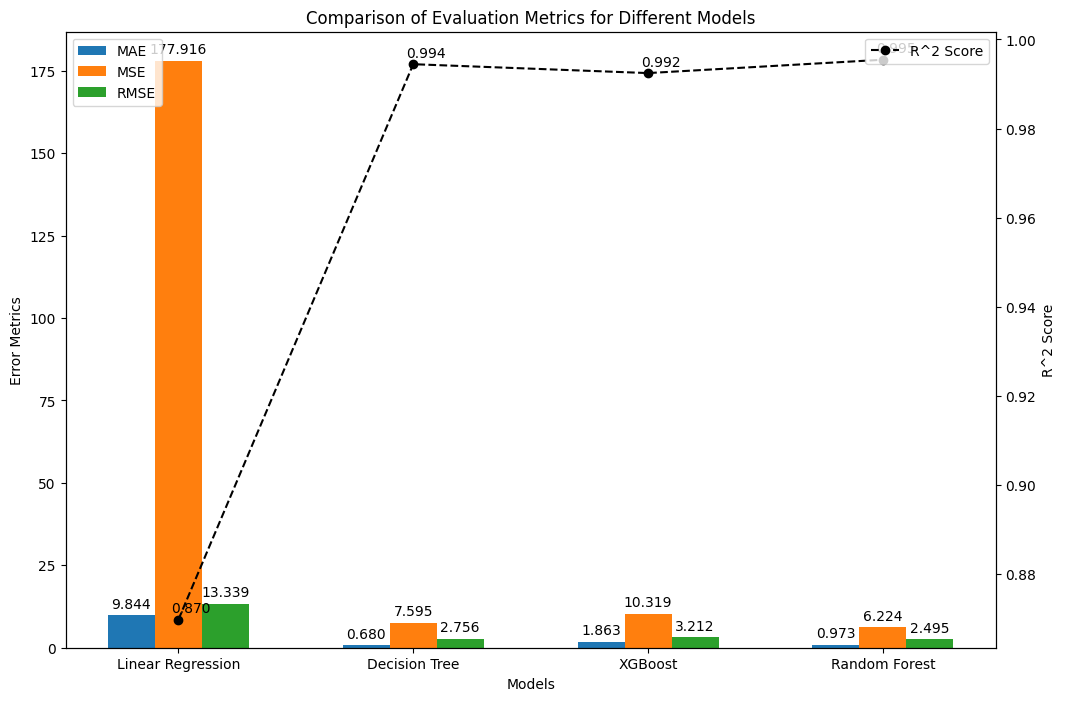

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Linear Regression', 'Decision Tree', 'XGBoost', 'Random Forest']
mae = [9.84389706545137, 0.6797509245599773, 1.8629525573457002, 0.9728320037373703]
mse = [177.91583487365446, 7.595360355485859,  10.318952369135697, 6.223977713923155]
rmse = [13.338509469714165,  2.7559681339750393,  3.2123126200816285, 2.4947901142026265]
r2 = [ 0.8697233660077118, 0.9944383928402222,0.9924440768190622, 0.9954425705436015]

x = np.arange(len(models))

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plots for MAE, MSE, RMSE
width = 0.2

bar1 = ax1.bar(x - width, mae, width, label='MAE')
bar2 = ax1.bar(x, mse, width, label='MSE')
bar3 = ax1.bar(x + width, rmse, width, label='RMSE')

# Line plot for R^2 Score
ax2 = ax1.twinx()
line = ax2.plot(x, r2, color='black', marker='o', label='R^2 Score', linestyle='--')

# Adding labels and title
ax1.set_xlabel('Models')
ax1.set_ylabel('Error Metrics')
ax2.set_ylabel('R^2 Score')
ax1.set_title('Comparison of Evaluation Metrics for Different Models')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adding bar labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

for i, v in enumerate(r2):
    ax2.annotate(f'{v:.3f}', xy=(i, v), xytext=(-5, 5), textcoords="offset points")

plt.show()


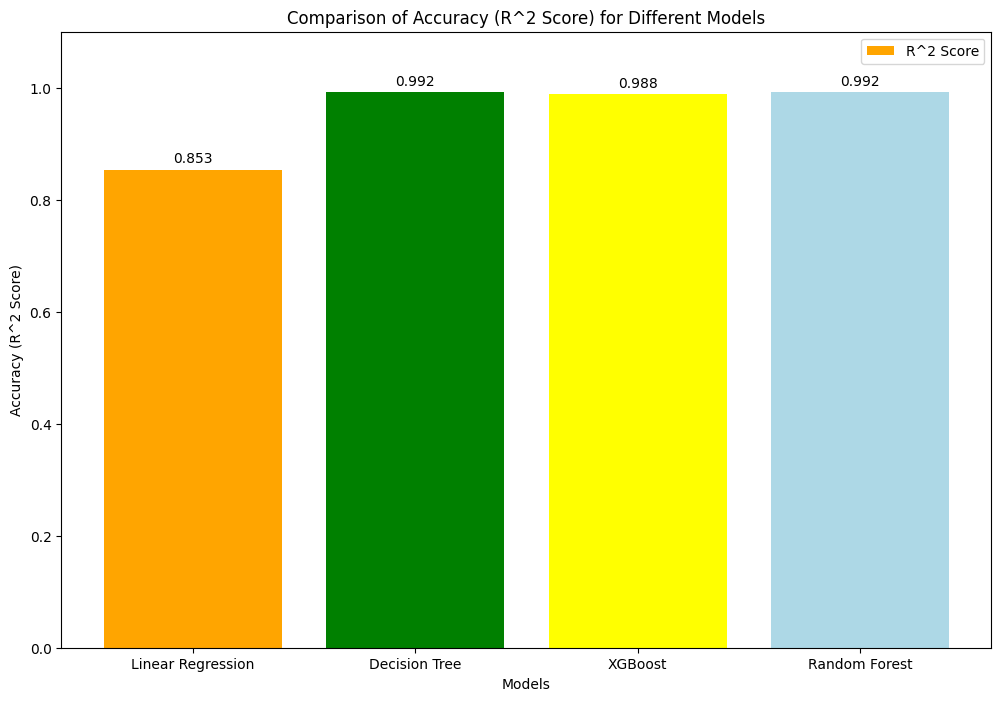

In [63]:
# Data
models = ['Linear Regression', 'Decision Tree', 'XGBoost', 'Random Forest']
r2 = [0.853, 0.992, 0.988, 0.992]

x = np.arange(len(models))

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Bar plot for R^2 Score
bars = ax.bar(x, r2, color=['orange', 'green', 'yellow', 'lightblue'], label='R^2 Score')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (R^2 Score)')
ax.set_title('Comparison of Accuracy (R^2 Score) for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1.1)

# Adding bar labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars)

plt.legend()
plt.show()


#### Choosing the best model

MAE (Mean Absolute Error): Lower values indicate better performance in terms of average absolute errors. <br>
MSE (Mean Squared Error): Lower values indicate better performance in terms of average squared errors.<br>
RMSE (Root Mean Squared Error): Lower values indicate better performance in terms of root mean squared errors. <br>
R-squared (r2) Score: Higher values (closer to 1) indicate better fit of the model to the data.<br>

According to the above evaluations <br>
Decision Regression Model has the lowest MAE, MSE, RMSE, and highest r2 Score among all the models, indicating that it performs the best overall in terms of accuracy and predictive power.<br>
XGBoost Model 2 also performs very well, with slightly higher MAE, MSE, and RMSE compared to the Decision Regression Model but still having a very high r2 Score

<h4>So I am chossing the model with "Decision Tree Regression"</h4>

### Saving All the models

In [64]:
import pickle

with open('Price_prediction_decision_tree.pkl', 'wb') as file:
    pickle.dump(decision_tree_pipline, file)

with open('Price_prediction_linear_tree.pkl', 'wb') as file:
    pickle.dump(liner_pip_line, file)    

with open('Price_prediction_xgBoost.pkl', 'wb') as file:
    pickle.dump(xg_boost_pip, file)    

with open('Price_prediction_random_pipe.pkl', 'wb') as file:
    pickle.dump(randome_pipe, file)    


